## Konut Binalarının Enerji Verimliliği

<font color = 'blue'>
Content:
  
1.[Load and Check Data](#1)
    
2.[Variable Description](#2)
    
3.[Variable Analysis](#3)
 
4.[Basic Data Analysis](#4)

5.[Outlier Detection](#5)
   
6.[Missing Value](#6)
  
7.[Data Visualization](#7)
    
8.[Feature Selection](#8)
   
9.[Modelling](#9)

* [Linear Regression](#10)
* [Random Forest](#11)
* [Decision Tree Regressor](#12)

In [69]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

<a id="1"></a><br>
### 1.Load and Check Data

In [70]:
# load data
data = pd.read_csv("data.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [71]:
# veri seti hakkında istatiksel bilgiler
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


<a id="2"></a><br>
### 2.Variable Description
1.  X1 (Relative Compactness) -> Bağıl Kompaktlık
2.  X2 (Surface Area - m²) -> Yüzey Alanı
3.  X3 (Wall Area - m²) -> Duvar Alanı
4.  X4 (Roof Area - m²) -> Çatı Alanı
5.  X5 (Overall Height - m) -> Toplam Yükseklik
6.  X6 (Orientation - 2:North, 3:East, 4:South, 5:West ) -> Binanın Yönü
7.  X7 (Glazing Area - 0%, 10%, 25%, 40% (of floor area)) -> Cam Alanı
8.  X8 (Glazing Area Distribution  (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West) -> Cam Alanının Dağılımı 
9.  Y1 (Heating Load - kWh/m²) -> Isıtma yükü
10. Y2 (Cooling Load - kWh/m²) -> Soğutma yükü

In [72]:
# data column isimlerini güncelleme
data_column_name = {"X1":"RelativeCompactness", 
                    "X2":"SurfaceArea", 
                    "X3":"WallArea",
                    "X4":"RoofArea",
                    "X5":"OverallHeight",
                    "X6":"Orientation",
                    "X7":"GlazingArea",
                    "X8":"GlazingAreaDist",
                    "Y1":"HeatingLoad",
                    "Y2":"CoolingLoad"}
data.rename(columns = data_column_name, inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RelativeCompactness  768 non-null    float64
 1   SurfaceArea          768 non-null    float64
 2   WallArea             768 non-null    float64
 3   RoofArea             768 non-null    float64
 4   OverallHeight        768 non-null    float64
 5   Orientation          768 non-null    int64  
 6   GlazingArea          768 non-null    float64
 7   GlazingAreaDist      768 non-null    int64  
 8   HeatingLoad          768 non-null    float64
 9   CoolingLoad          768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


* float64(8) : RelativeCompactness, SurfaceArea, WallArea, RoofArea, OveralHeight, GlazingArea, HeatingLoad, CoolingLoad
* int64(2) : GlazingAreaDist, Orientation

In [74]:
# her bir sutunun unique değerleri
for variable in data.columns:
    print(variable,":",data[variable].unique())

RelativeCompactness : [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
SurfaceArea : [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
WallArea : [294.  318.5 343.  416.5 245.  269.5 367.5]
RoofArea : [110.25 122.5  147.   220.5 ]
OverallHeight : [7.  3.5]
Orientation : [2 3 4 5]
GlazingArea : [0.   0.1  0.25 0.4 ]
GlazingAreaDist : [0 1 2 3 4 5]
HeatingLoad : [15.55  20.84  21.46  20.71  19.68  19.5   19.95  19.34  18.31  17.05
 17.41  16.95  15.98  28.52  29.9   29.63  28.75  24.77  23.93   6.07
  6.05   6.01   6.04   6.37   6.4    6.366  6.85   6.79   6.77   6.81
  7.18   7.1   10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5
 24.58  24.63  24.59  29.03  29.87  29.14  28.09  26.28  26.91  26.37
 25.27  23.53  24.03  23.54  22.58  35.56  37.12  36.9   35.94  32.96
 32.12  32.94  32.21  10.36  10.43  10.39  10.71  10.8   10.7   10.75
 11.11  11.13  11.09  11.16  11.68  11.69  11.7   15.41  15.2   15.42
 15.21  12.96  12.97  12.93  13.02  24.29

<a id="3"></a><br>
### 3.Variable Analysis

In [75]:
# verilerin dağılımını görme
def variable_plot(variable,color):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable], bins=50,color=color)
    plt.xlabel(variable)
    plt.title("{} Distribution".format(variable))
    plt.show()

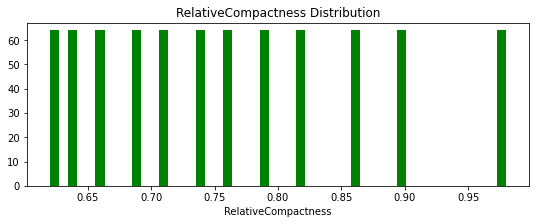

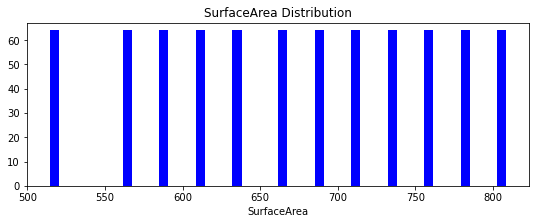

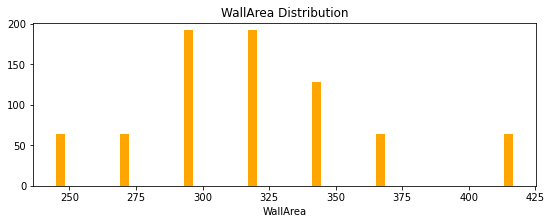

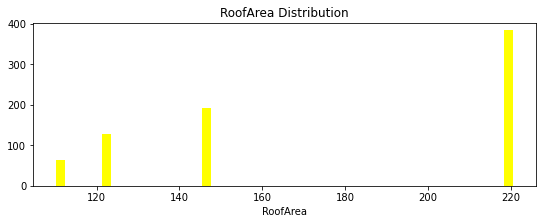

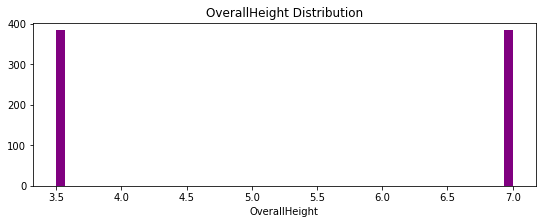

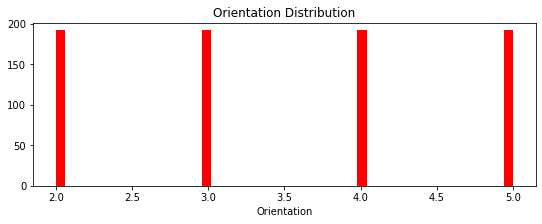

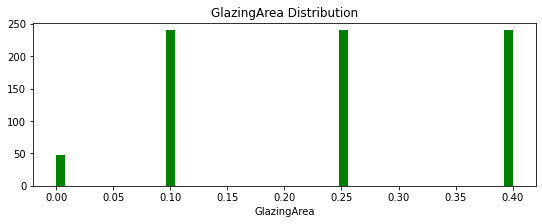

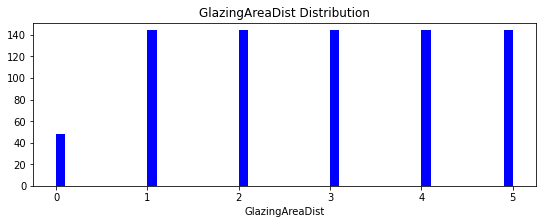

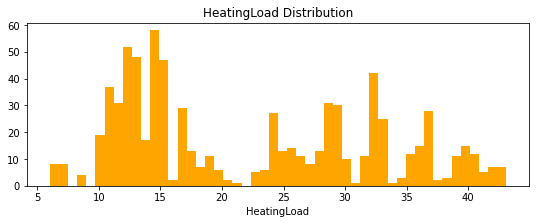

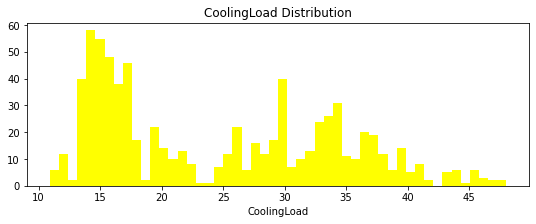

In [76]:
color_list = ["green", "blue", "orange", "yellow", "purple", "red", "green", "blue", "orange", "yellow"]
column_list = list(data.columns)
for i in range(10):
    variable_plot(column_list[i],color_list[i])

<a id="4"></a><br>
### 4.Basic Data Analysis

* Orientation-HeatingLoad (Binanın hangi yöne baktığının ısıtma yüküne etkisi nedir?)
* Orientation-CoolingLoad (Binanın hangi yöne baktığının soğutma yüküne etkisi nedir?)
* GlazingArea-HeatingLoad (Cam Alanının ısıtma yüküne etkisi nedir?)
* GlazingArea-CoolingLoad (Cam alanının soğutma yüküne etkisi nedir?)

In [77]:
# Orientation-HeatingLoad
data[["Orientation","HeatingLoad"]].groupby(["Orientation"], as_index=False).mean().sort_values(by="HeatingLoad", ascending=False)

,Orientation,HeatingLoad
1,3,22.380677
0,2,22.312865
3,5,22.275365
2,4,22.259875


In [78]:
# Orientation-CoolingLoad
data[["Orientation","CoolingLoad"]].groupby(["Orientation"], as_index=False).mean().sort_values(by="CoolingLoad", ascending=False)

,Orientation,CoolingLoad
3,5,24.953646
0,2,24.604531
2,4,24.480313
1,3,24.312552


In [79]:
# GlazingArea - HeatinLoad
data[["GlazingArea","HeatingLoad"]].groupby(["GlazingArea"], as_index=False).mean().sort_values(by="HeatingLoad", ascending=False)

,GlazingArea,HeatingLoad
3,0.40,25.411667
2,0.25,22.756917
1,0.10,20.357167
0,0.00,14.286375


In [80]:
# GlazingArea - CoolingLoad
data[["GlazingArea","CoolingLoad"]].groupby(["GlazingArea"], as_index=False).mean().sort_values(by="CoolingLoad", ascending=False)

,GlazingArea,CoolingLoad
3,0.40,26.911417
2,0.25,24.892625
1,0.10,22.935542
0,0.00,19.706250


<a id="5"></a><br>
### 5.Outlier Detection

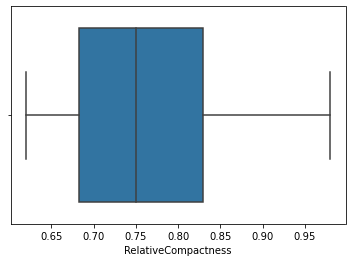

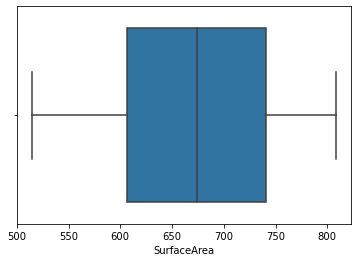

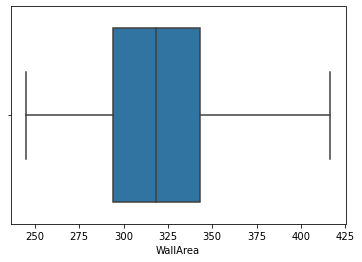

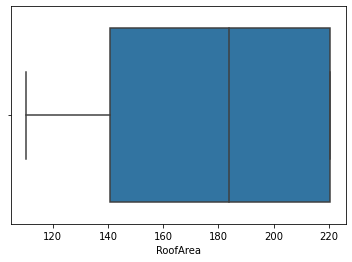

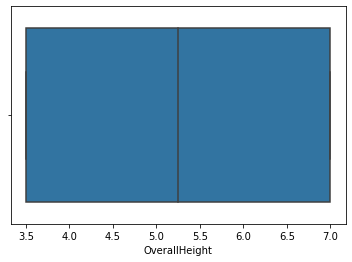

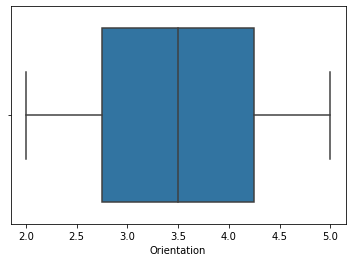

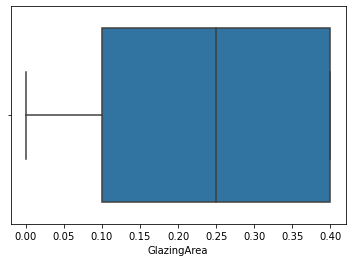

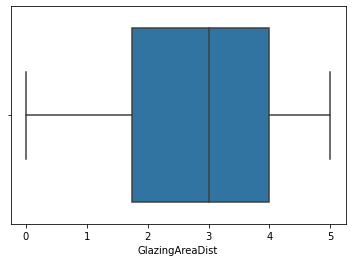

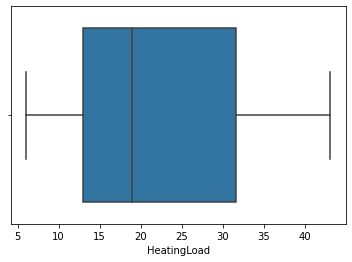

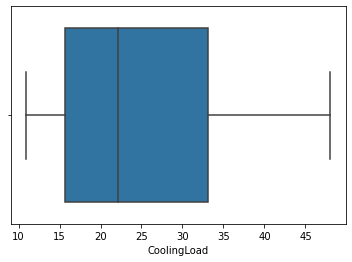

In [81]:
# box plot ile aykırı değer tespiti
for i in data.columns:
    sns.boxplot(x=data[i])
    plt.show()

* Veri setinde aykırı veri bulunmamaktadır.

<a id="6"></a><br>
### 6.Missing Value

In [82]:
# veri setinde eksik veri var mı
data.isnull().sum()

RelativeCompactness    0
SurfaceArea            0
WallArea               0
RoofArea               0
OverallHeight          0
Orientation            0
GlazingArea            0
GlazingAreaDist        0
HeatingLoad            0
CoolingLoad            0
dtype: int64

* Veri setinde eksik veri bulunmamaktadır.

<a id="7"></a><br>
### 7.Data Visualization

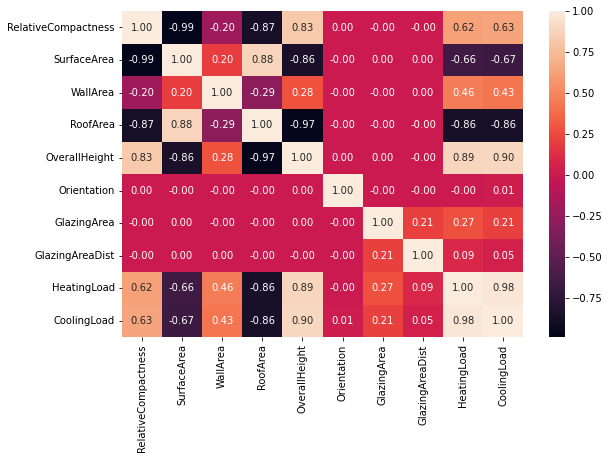

In [83]:
# veriler arasındaki korelasyonu görsel ile gösterme.
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

<a id="8"></a><br>
### 8.Feature Selection

In [84]:
# bağımlı ve bağımsız değişken
X = data.drop(["HeatingLoad", "CoolingLoad"],axis=1)
y = data[["HeatingLoad","CoolingLoad"]]

In [85]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<a id="9"></a><br>
### 9.Modelling

<a id="10"></a><br>
### Linear Regression

In [86]:
# Model oluşturma
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Tahmin 
# Test basarı skorları
y_pred = model.predict(X_test)
print("Test R2 Score:{}".format(r2_score(y_test, y_pred)))
print("Test MSE:{}".format(mean_squared_error(y_test,y_pred)))
print("Test RMSE:{}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

# Tahmin basarı skorları
y_pred_train = model.predict(X_train)
print("Train R2 Score:{}".format(r2_score(y_train, y_pred_train)))
print("Train MSE:{}".format(mean_squared_error(y_train,y_pred_train)))
print("Traim RMSE:{}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))

Test R2 Score:0.9027128187463034
Test MSE:9.523082231345509
Test RMSE:3.085949162145337
Train R2 Score:0.9014483948281202
Train MSE:9.30324780795088
Traim RMSE:3.0501225890037404


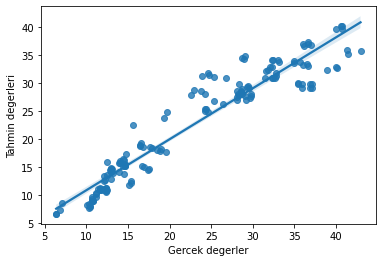

In [88]:
sns.regplot(x=y_test["HeatingLoad"], y=y_pred[:,0])
plt.xlabel("Gercek degerler")
plt.ylabel("Tahmin degerleri")
plt.show()

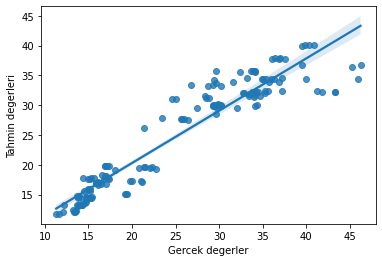

In [89]:
sns.regplot(x=y_test["CoolingLoad"], y=y_pred[:,1])
plt.xlabel("Gercek degerler")
plt.ylabel("Tahmin degerleri")
plt.show()

In [90]:
# Model doğrulama -> Doğrulanmış başarı metriklerimiz
# Doğrulanmış Train başarı metrikleri
kf = KFold(n_splits=10)
train_score = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")
train_score_mean = train_score.mean()
train_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")).mean()
train_mse = - cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error").mean()
print("Train score degerleri: ", train_score)
print("Train  Mean Score:", train_score_mean)
print("Train Std : " + str(train_score.std()))
print("Train RMSE:", train_rmse)
print("Train MSE:", train_mse)

# Doğrulanmış Test başarı metrikleri
test_score = cross_val_score(model, X_test, y_test, cv=kf, scoring="r2")
test_score_mean = test_score.mean()
test_rmse = np.sqrt(-cross_val_score(model, X_test, y_test, cv=kf, scoring="neg_mean_squared_error")).mean()
test_mse = - cross_val_score(model, X_test, y_test, cv=kf, scoring="neg_mean_squared_error").mean()
print("Test score degerleri: ", test_score)
print("Test Mean Score:", test_score_mean)
print("Test Std : " + str(test_score.std()))
print("Test RMSE:", test_rmse)
print("Test MSE:", test_mse)

Train score degerleri:  [0.90900441 0.90347672 0.90680661 0.88885642 0.88077584 0.92008319
 0.89838421 0.90826996 0.87270504 0.90175831]
Train  Mean Score: 0.8990120690372676
Train Std : 0.013586494551502752
Train RMSE: 3.0652618159505662
Train MSE: 9.517330612219375
Test score degerleri:  [0.88238686 0.84934941 0.92768532 0.90841903 0.8470501  0.84279188
 0.93720537 0.84815768 0.89835796 0.91833335]
Test Mean Score: 0.8859736951149497
Test Std : 0.03497545468593774
Test RMSE: 3.1770875334904796
Test MSE: 10.33600552876204


* 10 katlı cross validation bizim modelimizin daha güvenilir, doğrulanmış, valide edilmiş başarı metriklerini verir.

In [91]:
success_criterion_dict={"Success Criterion": ["Score", "RMSE", "MSE"],
                        "Train Score Metrics":[train_score_mean, train_rmse,train_mse], 
                        "Test Score Metrics":[test_score_mean, test_rmse, test_mse]}
success_criterion_data = pd.DataFrame(success_criterion_dict)
success_criterion_data

,Success Criterion,Train Score Metrics,Test Score Metrics
0,Score,0.899012,0.885974
1,RMSE,3.065262,3.177088
2,MSE,9.517331,10.336006


<a id="11"></a><br>
### Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [93]:
# Tahmin 
# Test basarı skorları
y_pred = rf_model.predict(X_test)
print("Test R2 Score:{}".format(r2_score(y_test, y_pred)))
print("Test MSE:{}".format(mean_squared_error(y_test,y_pred)))
print("Test RMSE:{}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

# Tahmin basarı skorları
y_pred_train = rf_model.predict(X_train)
print("Train R2 Score:{}".format(r2_score(y_train, y_pred_train)))
print("Train MSE:{}".format(mean_squared_error(y_train,y_pred_train)))
print("Traim RMSE:{}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))

Test R2 Score:0.9792038454345106
Test MSE:1.9406084904220775
Test RMSE:1.3930572459242576
Train R2 Score:0.9971803053437921
Train MSE:0.25446159501628535
Traim RMSE:0.5044418648529138


In [94]:
# en iyi hiperaparametre kombiansyonunu bulma
rf_params = {'max_depth' : list(range(1,10)),
             'min_samples_split': [3,5,7,10],
             'min_samples_leaf' : [4,5,6],
             'n_estimators': [50,100,500,1000]}
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1)
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 500, 1000]})

In [95]:
print("En iyi parametre kombinasyonu:",rf_cv_model.best_params_)
print("En iyi Skor:", rf_cv_model.best_score_)

En iyi parametre kombinasyonu: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}
En iyi Skor: 0.9789236520346103


In [96]:
# belirlenmiş parametreler ile modelin yeniden oluşturulması
rf_tuned_model = RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=1000)
rf_tuned_model.fit(X_train, y_train)

# Tahmin 
# Test basarı skorları
y_pred = rf_tuned_model.predict(X_test)
print("Test R2 Score:{}".format(r2_score(y_test, y_pred)))
print("Test MSE:{}".format(mean_squared_error(y_test,y_pred)))
print("Test RMSE:{}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

# Tahmin basarı skorları
y_pred_train = rf_tuned_model.predict(X_train)
print("Train R2 Score:{}".format(r2_score(y_train, y_pred_train)))
print("Train MSE:{}".format(mean_squared_error(y_train,y_pred_train)))
print("Traim RMSE:{}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))

Test R2 Score:0.9787812333108616
Test MSE:1.9902550922063837
Test RMSE:1.41076401010459
Train R2 Score:0.9847725982639846
Train MSE:1.3858772456723663
Traim RMSE:1.1772328765679143


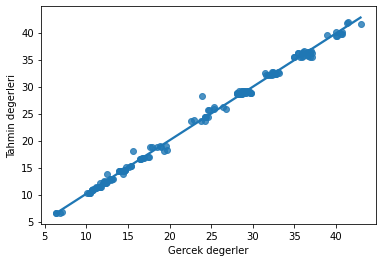

In [97]:
sns.regplot(x=y_test["HeatingLoad"], y=y_pred[:,0])
plt.xlabel("Gercek degerler")
plt.ylabel("Tahmin degerleri")
plt.show()

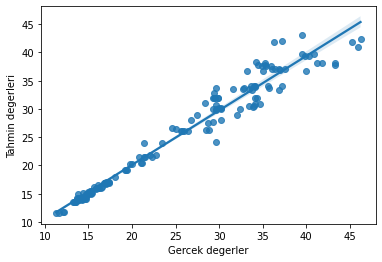

In [98]:
sns.regplot(x=y_test["CoolingLoad"], y=y_pred[:,1])
plt.xlabel("Gercek degerler")
plt.ylabel("Tahmin degerleri")
plt.show()

In [99]:
# Model doğrulama -> Doğrulanmış başarı metriklerimiz
# Doğrulanmış Train başarı metrikleri
kf = KFold(n_splits=10)
train_score = cross_val_score(rf_tuned_model, X_train, y_train, cv=kf, scoring="r2")
train_score_mean = train_score.mean()
train_rmse = np.sqrt(-cross_val_score(rf_tuned_model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")).mean()
train_mse = - cross_val_score(rf_tuned_model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error").mean()
print("Train score degerleri: ", train_score)
print("Train  Mean Score:", train_score_mean)
print("Train Std : " + str(train_score.std()))
print("Train RMSE:", train_rmse)
print("Train MSE:", train_mse)

# Doğrulanmış Test başarı metrikleri
test_score = cross_val_score(rf_tuned_model, X_test, y_test, cv=kf, scoring="r2")
test_score_mean = test_score.mean()
test_rmse = np.sqrt(-cross_val_score(rf_tuned_model, X_test, y_test, cv=kf, scoring="neg_mean_squared_error")).mean()
test_mse = - cross_val_score(rf_tuned_model, X_test, y_test, cv=kf, scoring="neg_mean_squared_error").mean()
print("Test score degerleri: ", test_score)
print("Test Mean Score:", test_score_mean)
print("Test Std : " + str(test_score.std()))
print("Test RMSE:", test_rmse)
print("Test MSE:", test_mse)

Train score degerleri:  [0.9826113  0.97837251 0.97995195 0.98221312 0.9773192  0.98216398
 0.97811863 0.97516046 0.98043455 0.97332888]
Train  Mean Score: 0.9789674594709264
Train Std : 0.0029534600789865853
Train RMSE: 1.366234309754492
Train MSE: 1.865056366351217
Test score degerleri:  [0.93924095 0.95420077 0.96044441 0.96865318 0.9535361  0.93806798
 0.97218097 0.82711357 0.91691305 0.91649167]
Test Mean Score: 0.934684265293026
Test Std : 0.0402619115279646
Test RMSE: 2.3173896047326656
Test MSE: 5.603688410424281


In [100]:
success_criterion_dict={"Success Criterion": ["Score", "RMSE", "MSE"],
                        "Train Score Metrics":[train_score_mean, train_rmse,train_mse], 
                        "Test Score Metrics":[test_score_mean, test_rmse, test_mse]}
success_criterion_data2 = pd.DataFrame(success_criterion_dict)
success_criterion_data2

,Success Criterion,Train Score Metrics,Test Score Metrics
0,Score,0.978967,0.934684
1,RMSE,1.366234,2.317390
2,MSE,1.865056,5.603688


<a id="12"></a><br>
### Decision Tree Regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg_model = DecisionTreeRegressor()
dtree_reg_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [102]:
# Tahmin 
# Test basarı skorları
y_pred = dtree_reg_model.predict(X_test)
print("Test R2 Score:{}".format(r2_score(y_test, y_pred)))
print("Test MSE:{}".format(mean_squared_error(y_test,y_pred)))
print("Test RMSE:{}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

# Tahmin basarı skorları
y_pred_train = dtree_reg_model.predict(X_train)
print("Train R2 Score:{}".format(r2_score(y_train, y_pred_train)))
print("Train MSE:{}".format(mean_squared_error(y_train,y_pred_train)))
print("Traim RMSE:{}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))

Test R2 Score:0.9692157603211495
Test MSE:2.872489142857142
Test RMSE:1.6948419226751332
Train R2 Score:1.0
Train MSE:7.708738487501743e-33
Traim RMSE:8.779942190869905e-17


In [103]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
dtree_cv_model = GridSearchCV(dtree_reg_model, param_grid, cv=10)
dtree_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [104]:
print("En iyi parametre kombinasyonu:",dtree_cv_model.best_params_)
print("En iyi Skor:", dtree_cv_model.best_score_)

En iyi parametre kombinasyonu: {'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}
En iyi Skor: 0.956096789898498


In [105]:
# en iyi hiperparametre kombinasyonu bulunduktan sonra modelin yeniden oluşturulması
dtree_tuned_model = DecisionTreeRegressor()
dtree_tuned_model.fit(X_train, y_train)

# Tahmin
y_pred = dtree_tuned_model.predict(X_test)
print("Test R2 Score:{}".format(r2_score(y_test, y_pred)))
print("Test MSE:{}".format(mean_squared_error(y_test,y_pred)))
print("Test RMSE:{}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

# Tahmin basarı skorları
y_pred_train = dtree_tuned_model.predict(X_train)
print("Train R2 Score:{}".format(r2_score(y_train, y_pred_train)))
print("Train MSE:{}".format(mean_squared_error(y_train,y_pred_train)))
print("Traim RMSE:{}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))

Test R2 Score:0.9692502360046127
Test MSE:2.868866415584415
Test RMSE:1.693772834704942
Train R2 Score:1.0
Train MSE:0.0
Traim RMSE:0.0


In [106]:
# Model doğrulama -> Doğrulanmış başarı metriklerimiz
# Doğrulanmış Train başarı metrikleri
kf = KFold(n_splits=10)
train_score = cross_val_score(dtree_tuned_model, X_train, y_train, cv=kf, scoring="r2")
train_score_mean = train_score.mean()
train_rmse = np.sqrt(-cross_val_score(dtree_tuned_model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")).mean()
train_mse = - cross_val_score(dtree_tuned_model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error").mean()
print("Train score degerleri: ", train_score)
print("Train  Mean Score:", train_score_mean)
print("Train Std : " + str(train_score.std()))
print("Train RMSE:", train_rmse)
print("Train MSE:", train_mse)

# Doğrulanmış Test başarı metrikleri
test_score = cross_val_score(dtree_tuned_model, X_test, y_test, cv=kf, scoring="r2")
test_score_mean = test_score.mean()
test_rmse = np.sqrt(-cross_val_score(dtree_tuned_model, X_test, y_test, cv=kf, scoring="neg_mean_squared_error")).mean()
test_mse = - cross_val_score(dtree_tuned_model, X_test, y_test, cv=kf, scoring="neg_mean_squared_error").mean()
print("Test score degerleri: ", test_score)
print("Test Mean Score:", test_score_mean)
print("Test Std : " + str(test_score.std()))
print("Test RMSE:", test_rmse)
print("Test MSE:", test_mse)

Train score degerleri:  [0.9784485  0.96442429 0.96294195 0.96898701 0.94752958 0.97496603
 0.96487493 0.96353737 0.97049182 0.97122455]
Train  Mean Score: 0.9667426030565898
Train Std : 0.008040872434346398
Train RMSE: 1.706321896929668
Train MSE: 2.9669439516129037
Test score degerleri:  [0.95554633 0.9754297  0.93995879 0.96131785 0.95524334 0.9293008
 0.96319971 0.89856882 0.92043605 0.93598916]
Test Mean Score: 0.9434990559534716
Test Std : 0.0219759113286856
Test RMSE: 2.1889997675105994
Test MSE: 4.9767549875


In [107]:
success_criterion_dict={"Success Criterion": ["Score", "RMSE", "MSE"],
                        "Train Score Metrics":[train_score_mean, train_rmse,train_mse], 
                        "Test Score Metrics":[test_score_mean, test_rmse, test_mse]}
success_criterion_data3 = pd.DataFrame(success_criterion_dict)
success_criterion_data3

,Success Criterion,Train Score Metrics,Test Score Metrics
0,Score,0.966743,0.943499
1,RMSE,1.706322,2.189000
2,MSE,2.966944,4.976755


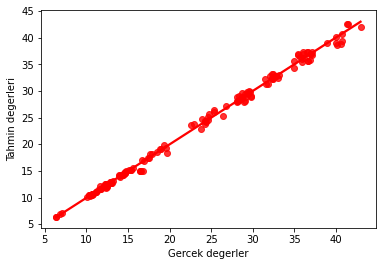

In [108]:
sns.regplot(x=y_test["HeatingLoad"], y=y_pred[:,0], color="red")
plt.xlabel("Gercek degerler")
plt.ylabel("Tahmin degerleri")
plt.show()

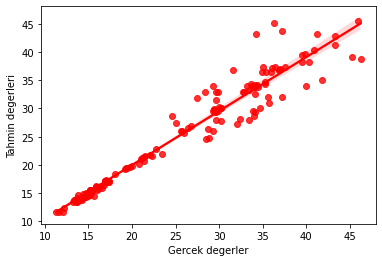

In [109]:
sns.regplot(x=y_test["CoolingLoad"], y=y_pred[:,1], color="red")
plt.xlabel("Gercek degerler")
plt.ylabel("Tahmin degerleri")
plt.show()